# Notes 
1. A Clean Python Notebook showing your work during the data exploration and feature
engineering phase.
2. Document and mention all experiments you did whether in jupyter notebooks or excel sheets.
3. You should have clear next steps and recommendations based on your analysis.
4. Powerpoint presentation showing insights you have found in the data and the best experiment in terms of data,features,model and results
5. Extra points for- modularized and reusable code and model deployment.
6. Delivery will be a github repo including all deliverables.

# Our Client 
Nawy is a one-stop-shop that will provide you with the key to your new home by presenting all the necessary information and helps you make an informed decision via reliable brokers. Users are able to search for available units by selecting criteria that match their needs.  We are partnered with all the big real estate developers. Our team includes experienced real estate brokers that facilitate the transaction. 

There is a lack of information in the Egyptian real estate market. Making an informed decision requires time-consuming manual work and comparing between available options is a difficult task. This creates an unnecessary time burden and leads to incorrect decision making when buying/selling properties. Brokers in Egypt have a bad reputation and are perceived to be untrustworthy.


# Defining the Problem and Project Goal

In Nawy we are initiating targeting campaigns on a daily basis to generate Real estate leads.<br>
The main pain is generating qualified leads.

* The first objective of this project is **to recognize key factors that will use to know qualified lead**.
* So we need **to build a model to classify the received leads into two categories: low qualified and high qualified leads.**

------------------------------------------------------------------------------------------------------------------

## Data Dictionary
* **lead_id** Is unique id representing customer (customer my reach more than one time)
* **customer_name** Name of the customer
* **lead_mobile_network** To differentiate between local and international customers
* **message** Message left by the customer
* **lead_time** Time of receiving the lead
* **method_of_contact** Contact method used to reach us
* **ad_group** Include information of target audience used in the campaign
* **lead_source** Channel used to reach us
* **campaign** Name of the targeting campaign
* **Location** The location which the customer is searching for
* **Low_qualified** Define if the lead is low or high qualified



# Importing libraries


In [3]:
## for data
import json
import pandas as pd
import numpy as np
import os
from datetime import datetime, date

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.0)

## for cleaning
import re

# Helper Functions


In [4]:
def clean_text(row):
    row =' '.join(re.findall('[A-Za-z0-9]+',  str(row))) 
    row = re.sub(r""" +""",' ',row)
    return row


def clustring_cat(leads,columns):
    leads.loc[(leads[columns].str.contains('facebook')) | (leads[columns].str.contains('fb')),columns] = 'facebook'
    leads.loc[(leads[columns].str.contains('instagram')),columns] = 'instagram'
    leads.loc[(leads[columns].str.contains('whats')) | (leads['lead_source'].str.contains('whast')),columns] = 'whatsapp'
    leads.loc[(leads[columns].str.contains('org')) | (leads['lead_source'].str.contains('com')) |(leads[columns].str.contains('net')) |(leads[columns].str.contains('io')),columns] = 'website'
    leads.loc[(leads[columns].str.contains('form')),columns] = 'form'
    leads.loc[(leads[columns].str.contains('personal')) | (leads[columns].str.contains('referral')) |(leads[columns].str.contains('client')),columns] = 'referral'
    leads.loc[(leads[columns].str.contains('call')) | (leads[columns].str.contains('hotline'))| (leads[columns].str.contains('sms')),columns] = 'phone'
    leads.loc[(leads[columns].str.contains('google')),columns] = 'google'
    leads.loc[(leads[columns].str.contains('app')),columns] = 'app'

    categories=['facebook','form','website','whatsapp','phone','referral','app','google','landing page','unknown']
    leads.loc[~(leads[columns].isin(categories)),columns] = 'other'
    return leads


# Get the data

In [5]:
# Let us load the data now.
DATA_PATH="./dataset/"
leads=pd.read_csv(DATA_PATH+"dataset.csv",low_memory=False).drop(columns=['Unnamed: 11' ,'Unnamed: 12'])


#  Clean the Data



In [26]:
leads.sample(10).T

,13820,36297,64392,69655,22939,76555,21932,28012,79545,85241
lead_id,28281,50117,74675,79669,36004,86234,35181,40368,89116,94625
customer_name,منار عبد الحميد محمد عبد الله,Salah Saad,Tamer Elkhateb,Aya Ramadan,إيمان احمد سليم,Hany abul ghaiet,Aya Mahmoud,Mohsen Akram,DäLiä Abd Elfatah,Mohamed fekry
lead_mobile_network,Vodafone,Gulf,Etisalat,Orange,Orange,Gulf,Orange,Orange,Vodafone,Vodafone
message,message : بسأل عن الدوبلكس,ad_id : 23848252596060664 \nadgroup_id : 23848...,ad_id : 23849966594760562 \nadgroup_id : 23849...,ad_id : 23850481397800540 \nadgroup_id : 23850...,ad_id : 23848117182480540 \nadgroup_id : 23848...,ad_id : 23850279525690562 \nadgroup_id : 23850...,ad_id : 23847616223880398 \nadgroup_id : 23847...,message: Need to know about space for challis...,ad_id : 23850071319530664 \nadgroup_id : 23850...,message:
lead_time,2020-11-01 14:16:22.818000,2021-09-01 18:42:36.114490,2022-02-22 19:14:31.994515,2022-03-21 01:04:51.815317,2021-06-07 18:11:54.202000,2022-04-19 13:49:44.731140,2021-05-24 22:13:45.155000,2021-07-24 08:14:19.999000,2022-05-01 20:28:11.689252,2022-05-16 21:40:37.142236
method_of_contact,form adwords,facebook,facebook,facebook,facebook,facebook,facebook,l.facebook.com,facebook,generic form
ad_group,none,marassi - khaleeji lookalike,haptown - open targeting,palm parks - general audience with october int...,mazarine - general audience with real estate i...,the lakes bloomfields - khaleeji lookalike,skala - general audience with real estate inte...,none,"jefaira - custom audience: lookalike (eg, 1%) ...",katameya_creeks
lead_source,google,facebook,facebook,facebook,facebook,facebook,facebook,facebook,facebook,google
campaign,NaN,emaar misr - lead generation - new - cooing 1,hassan allam - lead generation - cooing 2 - new,palm hills - lead generation - cooing 4 - new,city edge - lead generation - cooing 4,tatweer misr - lead generation - cooing 2 - new,mv - lead generation - cooing 3,none,inertia - lead generation - cooing 1,dev_-_starlight_developments
location,al burouj,marassi,haptown,palm parks,mazarine,mostakbal city villa offer,skala,/,jefaira,katameya creeks


In [5]:
print("The shape of the data is -> {} \n ".format(leads.shape))
leads.info()

The shape of the data is -> (91129, 11) 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91129 entries, 0 to 91128
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_id              91129 non-null  int64 
 1   customer_name        91129 non-null  object
 2   lead_mobile_network  91128 non-null  object
 3   message              89091 non-null  object
 4   lead_time            91129 non-null  object
 5   method_of_contact    91129 non-null  object
 6   ad_group             91057 non-null  object
 7   lead_source          91129 non-null  object
 8   campaign             90349 non-null  object
 9   location             90980 non-null  object
 10  low_qualified        91129 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.6+ MB


There are alot to handle in this data from data type and missing values and incorrect data values

In [28]:
# Checking for missing values
(leads.isnull().sum()/len(leads))*100

lead_id                0.000000
customer_name          0.000000
lead_mobile_network    0.001097
message                2.236390
lead_time              0.000000
method_of_contact      0.000000
ad_group               0.079009
lead_source            0.000000
campaign               0.855930
location               0.163504
low_qualified          0.000000
dtype: float64

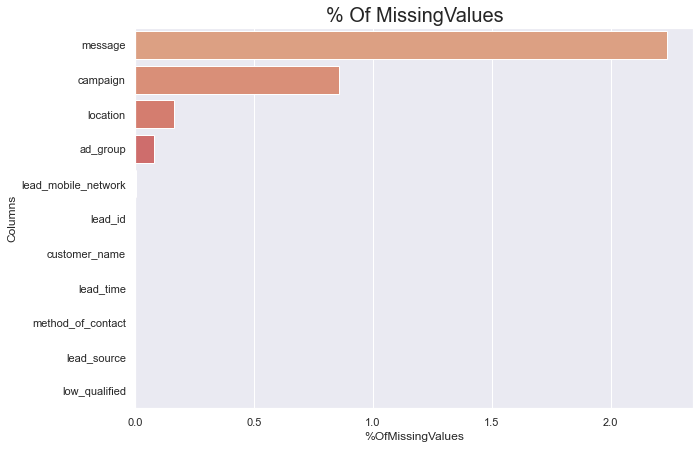

In [31]:
missingvalues=pd.DataFrame((leads.isnull().sum()/len(leads))*100).reset_index().rename(columns={"index":"Columns",0:"%OfMissingValues"}).sort_values(by='%OfMissingValues',ascending=False)
sns.barplot(x='%OfMissingValues', y='Columns', data=missingvalues[:15],palette='flare');
plt.title("% Of MissingValues",fontsize=20);



In [7]:
print("% of losing samples if we drop all null values:\n"+"_"*45,"\n\n",(leads.isnull().sum()/len(leads))*100)

% of losing samples if we drop all null values:
_____________________________________________ 

 lead_id                0.000000
customer_name          0.000000
lead_mobile_network    0.001097
message                2.236390
lead_time              0.000000
method_of_contact      0.000000
ad_group               0.079009
lead_source            0.000000
campaign               0.855930
location               0.163504
low_qualified          0.000000
dtype: float64


we can drop missing values in this dataset, because the percentage of missing is very small

----------------------------------------------------------------------------------

In [8]:
leads=leads.dropna()
print("% of losing samples if we drop all null values:\n"+"_"*45,"\n\n",(leads.isnull().sum()/len(leads))*100)

% of losing samples if we drop all null values:
_____________________________________________ 

 lead_id                0.0
customer_name          0.0
lead_mobile_network    0.0
message                0.0
lead_time              0.0
method_of_contact      0.0
ad_group               0.0
lead_source            0.0
campaign               0.0
location               0.0
low_qualified          0.0
dtype: float64


In [9]:
# Checking for duplicates values
leads.duplicated().sum()

0

**Lead ID**

In [10]:
# Let us see unique of lead_id feature
leads['lead_id'].value_counts()[:10]

69334    337
75772    103
31069     57
57328     46
61131     44
1116      39
76915     37
2360      36
30600     33
28149     31
Name: lead_id, dtype: int64

 * Lead ID may be repeated due to the customer my reach more than one time, we will see if we can benfit from that.
 * **69334** and **75772** IDs look suspicious. We want to check them

In [11]:
id_lst=[75772,69334]
leads[leads['lead_id'].isin(id_lst)].sample(10)

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
58409,69334,Test,Etisalat,message:,2022-03-20 21:44:23.211057,website,none,website,none,mountain view - icity - october,1
65582,75772,Testttttttt,Vodafone,message:,2022-05-22 14:58:15.460001,website,none,website,none,mountain view - icity - october,1
58487,69334,Test,Etisalat,message:,2022-03-22 11:32:43.677272,website,none,website,(none),mountain view - icity - october,1
58439,69334,Test,Etisalat,message:,2022-03-20 22:46:57.753034,website,none,website,(none),mountain view - icity - october,1
58633,69334,Test,Etisalat,message:,2022-05-16 21:14:03.291166,organic form,none,organic search,(none),azad,1
58697,69334,Test,Etisalat,message:,2022-05-26 08:22:51.532404,organic form,none,organic form,none,badya palm hills,1
58664,69334,Test,Etisalat,message:,2022-05-22 14:50:56.487844,website,none,website,none,bo sands - north coast,1
58613,69334,Test,Etisalat,message:,2022-04-20 12:02:08.599982,website,none,website,(none),mountain view - icity - october,1
58677,69334,Test,Etisalat,message:,2022-05-23 11:26:54.948859,website,none,website,none,new giza,1
65592,75772,Testttttttt,Vodafone,message:,2022-05-22 15:34:48.485702,organic form,none,organic form,none,mountain view - icity - october,1


As we expected, the data is NOT REAL

In [12]:
leads=leads[~leads['lead_id'].isin(id_lst)]

In [13]:
# Let us see unique of customer_name feature
leads['customer_name'].value_counts()[:10]

Rubbish     847
Ahmed       612
Mohamed     489
Database    250
Mahmoud     169
Amr         131
Mostafa     124
Mohamed     115
Unknown     112
Khaled      105
Name: customer_name, dtype: int64

No need for name column, we will drop it.

In [14]:
print("% of lead_mobile_network:\n"+"*"*25)
leads['lead_mobile_network'].value_counts()/len(leads)*100

% of lead_mobile_network:
*************************


Vodafone    42.502424
Orange      19.895067
Etisalat    17.953807
Gulf        13.570573
Others       2.704306
US_Canda     1.266039
Europe       1.131451
WE           0.974052
?            0.001141
hykjghk      0.001141
Name: lead_mobile_network, dtype: float64

In [15]:
leads['lead_mobile_network'].replace({'?':"Others" , 'hykjghk':"Others"},inplace=True)
print("% of lead_mobile_network:\n"+"*"*25)
leads['lead_mobile_network'].value_counts()/len(leads)*100

% of lead_mobile_network:
*************************


Vodafone    42.502424
Orange      19.895067
Etisalat    17.953807
Gulf        13.570573
Others       2.706587
US_Canda     1.266039
Europe       1.131451
WE           0.974052
Name: lead_mobile_network, dtype: float64

**Message**

In [16]:
leads['message'].sample(5).values

array(['location : https://old.nawy.com/top-compounds/79?lang=en&utm_campaign=Dev_-_Al_Ahly_for_Real_Estate&utm_adgroup=Gaia&gclid=EAIaIQobChMI0b3uw_fT8QIVFNtRCh3dwA6hEAAYASAAEgJMyvD_BwE',
       'ad_id : 23850213057720562 \nadgroup_id : 23850213057720562 \nadset_id : 23850213057730562 \ncampaign_id : 23850207648790562 \nconfirm_your_phone_number_ : 0100640996 \ncreated_time : 2022-03-24T10:39:40+0000 \nform_id : 493003378856092 \nFacebook_id : 656652782290241 \nleadgen_id : 656652782290241 \npage_id : 653106524827671 \nplatform : fb \n',
       'I would like more information on https://www.nawy.com/prime-compounds/Palm Hills New Cairo Compound?utm_campaign=DEV_-_PALM_HILLS&utm_adgroup=Palm_Hills_-_New_Cairo_Compound&gclid=Cj0KCQiAuvOPBhDXARIsAKzLQ8Fkc8i3_reNqBPzOgFW6lEaMm2OHngHCqvhVgCWnODptzzsTp1ksN0aApjtEALw_wcB&a=1942220425.1643989537 https://www.nawy.com/prime-compounds/Palm',
       'ad_id : 23846126110650664 \nadgroup_id : 23846126110650664 \nadset_id : 23846126110660664 \ncampai

In [17]:
leads['message']=leads['message'].apply(lambda x: re.findall('message: (.*)', x))
leads['message']=leads['message'].str[0]
leads = leads.replace(r'^\s*$', np.NaN, regex=True)

In [18]:
leads['message'].isna().sum()/len(leads)

0.9420017108639863

There are more than 94% missing values,so I will drop it

**Lead Time**

In [19]:
leads[['lead_time']].sample(10)

,lead_time
6993,2022-03-22 11:31:06.026780
1196,2021-07-07 12:15:03.103000
17232,2021-03-01 19:53:18.297000
36005,2021-08-31 08:28:21.159498
29669,2022-05-02 10:29:13.284540
47684,2021-11-19 09:55:24.015423
72390,2022-04-03 08:45:13.607659
10814,2020-08-06 00:53:13.672000
78835,2022-04-29 03:05:29.123610
80745,2022-05-04 20:02:29.576117


In [40]:
# fixing the data type 
leads['lead_time']=pd.to_datetime(leads['lead_time'],errors='coerce')
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87668 entries, 0 to 91128
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   lead_id              87668 non-null  int64         
 1   customer_name        87668 non-null  object        
 2   lead_mobile_network  87668 non-null  object        
 3   message              5084 non-null   object        
 4   lead_time            87668 non-null  datetime64[ns]
 5   method_of_contact    87668 non-null  object        
 6   ad_group             87668 non-null  object        
 7   lead_source          87668 non-null  object        
 8   campaign             87668 non-null  object        
 9   location             87668 non-null  object        
 10  low_qualified        87668 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 8.0+ MB


In [41]:
leads=leads.dropna(subset='lead_time')
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87668 entries, 0 to 91128
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   lead_id              87668 non-null  int64         
 1   customer_name        87668 non-null  object        
 2   lead_mobile_network  87668 non-null  object        
 3   message              5084 non-null   object        
 4   lead_time            87668 non-null  datetime64[ns]
 5   method_of_contact    87668 non-null  object        
 6   ad_group             87668 non-null  object        
 7   lead_source          87668 non-null  object        
 8   campaign             87668 non-null  object        
 9   location             87668 non-null  object        
 10  low_qualified        87668 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 8.0+ MB


In [42]:
#leads.replace({"none":np.nan,"(none)":np.nan},inplace=True)

We can not conver type of column time_lead to date dute to there are string in the column we need to fix it.

**Method of Contact**

In [43]:
leads['method_of_contact'].value_counts()[:20]

facebook    49561
form        16532
app          8630
phone        6552
website      3485
referral     1974
google        768
other         166
Name: method_of_contact, dtype: int64

We may want to reducing number of unique value

In [44]:
leads=clustring_cat(leads,'method_of_contact')

In [45]:
leads['method_of_contact'].value_counts()

facebook    49561
form        16532
app          8630
phone        6552
website      3485
referral     1974
google        768
other         166
Name: method_of_contact, dtype: int64

DONE !!

**Ad group**

In [46]:
leads['ad_group'].value_counts()[:20]


unkown                                                                          36519
mountain view october khaleeji lookalike 3                                        995
                                                                                  721
mountain view october general audience with investment real estate interests      697
aura apartments general audience real estate interests                            550
the lakes bloomfields khaleeji lookalike                                          473
il bosco city real estate interest                                                442
il bosco city khaleeji lookalike                                                  430
sodic east general audience with real estate interests                            389
belle vie general audience real estate interests                                  382
o west western audience                                                           350
mivida blue views residences general audience real est

In [47]:
leads['ad_group']=leads['ad_group'].apply(lambda x: clean_text(x))

leads.loc[(leads['ad_group']=='none'),'ad_group']='unkown'


In [48]:
leads['ad_group'].value_counts()[:50]

unkown                                                                          36519
mountain view october khaleeji lookalike 3                                        995
                                                                                  721
mountain view october general audience with investment real estate interests      697
aura apartments general audience real estate interests                            550
the lakes bloomfields khaleeji lookalike                                          473
il bosco city real estate interest                                                442
il bosco city khaleeji lookalike                                                  430
sodic east general audience with real estate interests                            389
belle vie general audience real estate interests                                  382
o west western audience                                                           350
mivida blue views residences general audience real est

**Lead Source**

In [49]:
leads['lead_source'].value_counts()[:20]

facebook        51131
google          19322
website          7216
phone            3761
app              2256
referral         1976
landing page     1146
other             408
unknown           404
form               48
Name: lead_source, dtype: int64

same to method of contact

In [50]:

leads=clustring_cat(leads,"lead_source")

In [51]:
leads['lead_source'].value_counts()

facebook        51131
google          19322
website          7216
phone            3761
app              2256
referral         1976
landing page     1146
other             408
unknown           404
form               48
Name: lead_source, dtype: int64

**Campaign**

In [52]:
leads['campaign'].value_counts()[:20]

unknown                                                  21839
google cpc                                                2615
mountain view lead generation cooing 3                    1586
emaar lead generation cooing 3                            1431
emaar misr lead generation cooing 2 new                   1428
misr italia lead generation cooing 1 new                  1403
sodic lead generation new cooing 3                        1345
mountain view lead generation cooing 4                    1310
sodic lead generation new cooing 2                        1281
dev palm hills                                            1113
emaar lead generation cooing 4 new                         994
dev dorra                                                  990
palm hills lead generation cooing 3 new                    966
palm hills lead generation cooing 2 new                    952
sodic lead generation new cooing 4                         884
city edge lead generation                              

In [53]:
leads.loc[(leads['campaign']=='none')|(leads['campaign']=='(none)'),'campaign']='unknown'
leads['campaign']=leads['campaign'].apply(lambda x: clean_text(x))

leads['campaign'].value_counts()[:20]

unknown                                                  21839
google cpc                                                2615
mountain view lead generation cooing 3                    1586
emaar lead generation cooing 3                            1431
emaar misr lead generation cooing 2 new                   1428
misr italia lead generation cooing 1 new                  1403
sodic lead generation new cooing 3                        1345
mountain view lead generation cooing 4                    1310
sodic lead generation new cooing 2                        1281
dev palm hills                                            1113
emaar lead generation cooing 4 new                         994
dev dorra                                                  990
palm hills lead generation cooing 3 new                    966
palm hills lead generation cooing 2 new                    952
sodic lead generation new cooing 4                         884
city edge lead generation                              

**Location**

In [54]:
leads['location'].value_counts()[:20]

unknown                             12783
marassi                              3337
mountain view october apartments     2521
badya                                1801
palm hills new cairo                 1792
il bosco city                        1766
sodic east                           1493
zed east                             1455
al burouj                            1282
jefaira                              1224
address east                         1174
the gate                             1155
belle vie                            1108
village west                         1104
v residence                          1019
cairo gate                            882
noor city                             858
eastown                               851
aura cfc                              844
zed                                   793
Name: location, dtype: int64

In [55]:
leads.loc[(leads['location']=='none'),'location']='unknown'

In [56]:
leads['location'].value_counts()[:20]

unknown                             12783
marassi                              3337
mountain view october apartments     2521
badya                                1801
palm hills new cairo                 1792
il bosco city                        1766
sodic east                           1493
zed east                             1455
al burouj                            1282
jefaira                              1224
address east                         1174
the gate                             1155
belle vie                            1108
village west                         1104
v residence                          1019
cairo gate                            882
noor city                             858
eastown                               851
aura cfc                              844
zed                                   793
Name: location, dtype: int64

**Low Qualified**

In [57]:
leads['low_qualified'].value_counts()

0    72408
1    15260
Name: low_qualified, dtype: int64

Uncorrected values in our target column


In [59]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87668 entries, 0 to 91128
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   lead_id              87668 non-null  int64         
 1   customer_name        87668 non-null  object        
 2   lead_mobile_network  87668 non-null  object        
 3   message              5084 non-null   object        
 4   lead_time            87668 non-null  datetime64[ns]
 5   method_of_contact    87668 non-null  object        
 6   ad_group             87668 non-null  object        
 7   lead_source          87668 non-null  object        
 8   campaign             87668 non-null  object        
 9   location             87668 non-null  object        
 10  low_qualified        87668 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 8.0+ MB


In [60]:
leads.to_csv("./dataset/leads_v1.csv",index=False)